#Load the necessary libraries

In [28]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

#Load the YOLOv5 model

In [20]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-2 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


#Create a list containing the images you want the model to perform object detection on

In [22]:
# List of sample images
sample_images = ['yolo_image_1.jpg', 'yolo_image_2.jpg']

#Define a function to save these images after processing and to create bounding boxes and labels

In [33]:
# Function to visualize bounding boxes and save the images
def save_and_display_boxes(image, boxes, labels, scores, output_path):
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        label = f"{labels[i]} {scores[i]:.2f}"
        color = (0, 255, 0)  # Bounding box color (green)

        # Draw the bounding box and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 5)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 3)

    # Save the processed image
    cv2.imwrite(output_path, image)

    # Display the processed image
    display(Image(filename=output_path))

#Iterate through the list of images and call the above function to detect objects and display bounding boxes and labels

Processing image: yolo_image_1.jpg
Objects detected in yolo_image_1.jpg.


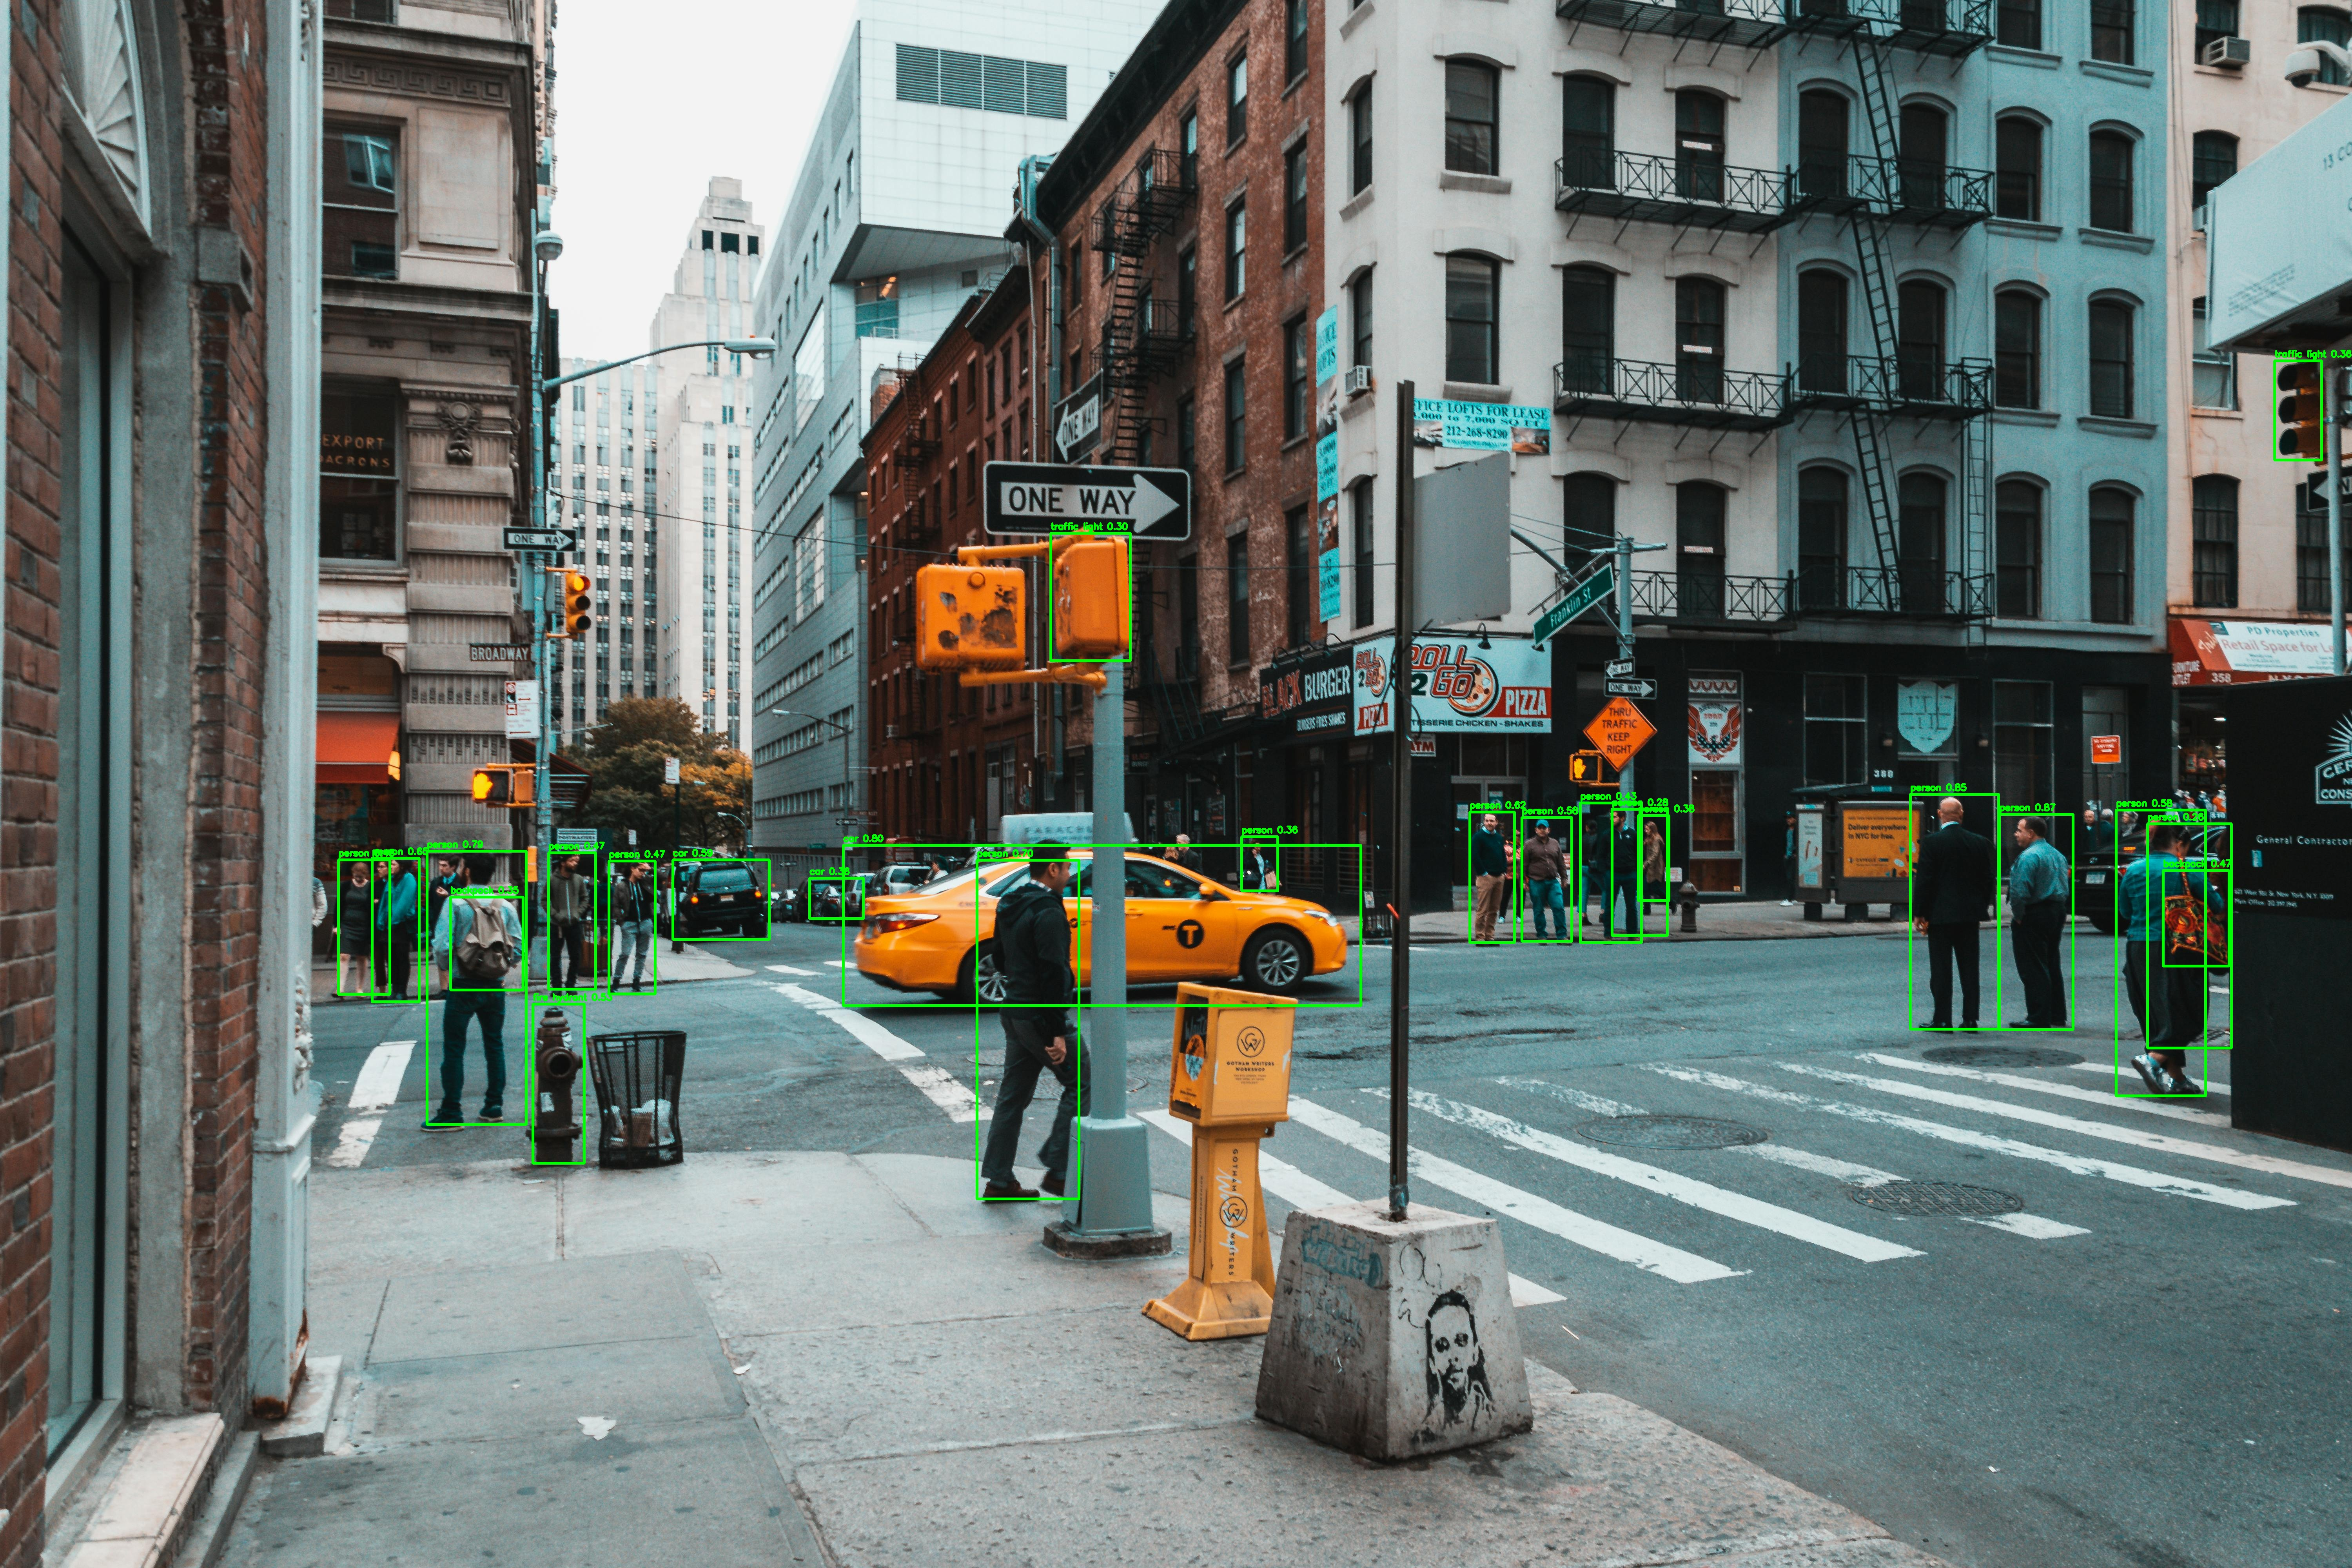

Processing image: yolo_image_2.jpg
Objects detected in yolo_image_2.jpg.


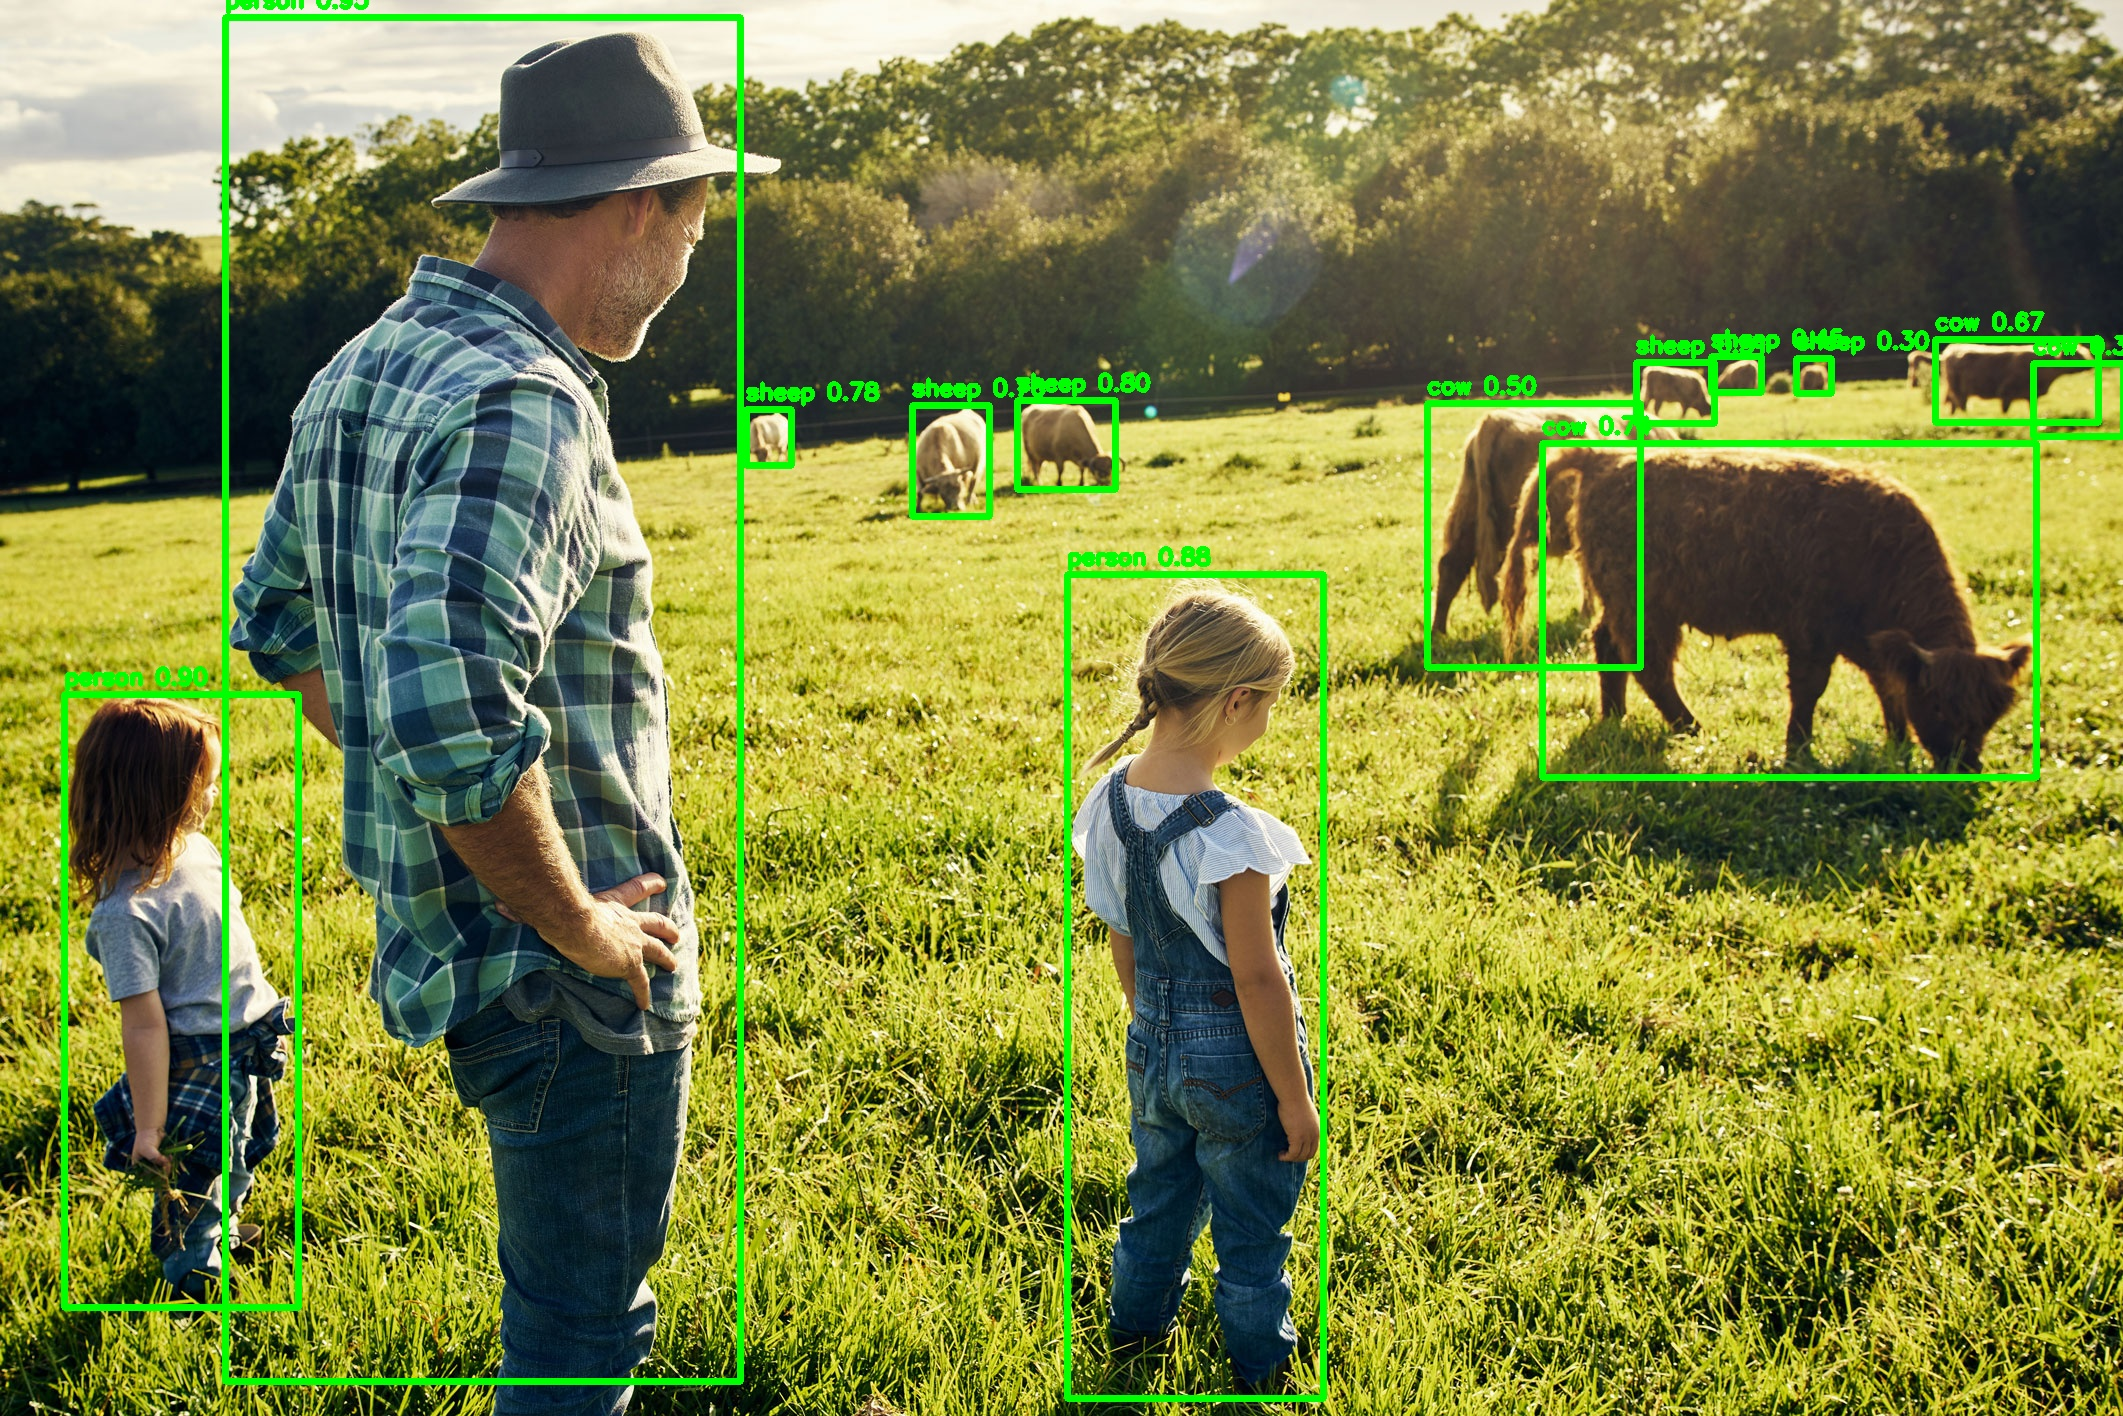

In [35]:
# Process each image in the list
for img_path in sample_images:
    print(f"Processing image: {img_path}")
    img = cv2.imread(img_path)
    if img is None:
        print(f"Could not read image {img_path}")
        continue

    # Run inference
    results = model(img)

    # Check results
    if len(results.xyxy[0]) == 0:
        print(f"No objects detected in {img_path}.")
    else:
        print(f"Objects detected in {img_path}.")
        # Parse results
        boxes = results.xyxy[0][:, :4].numpy()  # Bounding boxes
        scores = results.xyxy[0][:, 4].numpy()  # Confidence scores
        class_ids = results.xyxy[0][:, 5].numpy()  # Class labels
        labels = [model.names[int(class_id)] for class_id in class_ids]

        # Define output path for the processed image
        output_path = f"processed_{img_path}"

        # Save and display the results
        save_and_display_boxes(img, boxes, labels, scores, output_path)